## Import Libraries and Load Data ##

In [8]:
#Import liraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re #regular expression library
from sklearn.impute import SimpleImputer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [9]:
#Load data from local folder
data = (pd.read_csv
        ('C:\\Users\\Nnameka\\Downloads\\novel-corona-virus-Apr2020\\covid_19_data.csv', 
         index_col='SNo'))

print(f'Observations:', data.shape[0])
print()
print(f'Attributes:', data.shape[1])
print()
data.head()

Observations: 10671

Attributes: 7



,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Data Preprocessing ##

In [10]:
#Fill NaN, None,'From Diamond Princess' values in Province/State with corresponding country names.
#For these observations, we dont know the exact location of the observation,we aggregate on country level

data['Province/State'] = (data['Province/State'].replace(np.nan, data['Country/Region']).
                          replace('From Diamond Princess', data['Country/Region']).
                          replace('Grand Princess Cruise Ship', data['Country/Region']).
                          replace('None', data['Country/Region']))


In [11]:
# Extracting the state code
data['Province/State'] = data['Province/State'].astype(str).apply(lambda x: x.split(' (')[0])
  

In [12]:
#Create a dictionary of state name abbreviations
state_dict = {'D.C.':'District Columbia','AL':'Alabama','AK':'Alaska', 'AZ':'Arizona',
              'AR':'Arkansas','CA':'Califonia','CO':'Colorado','CT':'Connecticut',
              'FL':'Florida','GA':'Georgia','HI':'Hawaii','IL':'Illinois', 
              'IN':'Indiana','IA':'Iowa','KS':'Kansas','TX':'Texas', 'NE':'Nebraska',
              'KY':'Kentucky','LA':'Louisiana', 'ME':'Maine','MD':'Maryland',
              'MA':'Masachusetts', 'MI':'Michigan', 'QC':'Quebec','NV':'Nevada','TN':'Tennessee',
              'SC':'South Carolina', 'UT':'Utah','MO':'Missouri','OR ':'Oregon',
              'MN':'Minnesota','NH':'New Hmapshire','NJ':'NewJersey','NM':'New Mexico', 
              'NY':'New York','NC':'North Carolina', 'OH':'Ohio','OK':'Okloahome',
              'OR':'Oregon','PA':'Pennsylvia', 'VT':'Vermont','VA':'Virginia',
              'WA':'Washington','WV':'West Virginia','WI':'Wisconsir','WY':'Wyoming',
              'ON':'Oklahoma','RI':'Rhode Island','Nigeria':'Lagos'}


#Replace state abbreciations with fullnames 
data['Province/State'] = data['Province/State'].replace(state_dict)

#Create name abbrevaition dict
country_dict = {'US': 'United States','UK': 'United Kingdom', 'Mainland China':'China'}

#Map dictionary of country names
data['Country/Region'] = (data['Country/Region'].replace(country_dict))

In [13]:
#Create a function to clean up regular expressions
def cleanRE(data):
    data = data.replace('"', '')
    data = data.strip('\"')
    data = re.sub(r'[0-9(,;)-]+', '', data)
    return data

In [ ]:
data.head()
data[data['Country/Region'] == 'Others'].shape

print(data.shape)
print()
data.drop(data[data['Country/Region'] == 'Others'].index,inplace =True) #Remove 'Others' in country column
data.drop(data[data['Country/Region'] == 'Diamond Princess'].index,inplace =True #Remove'Diamond Princess'

data['Country/Region'] = data['Country/Region'].astype(str).apply(cleanRE)

In [17]:
data['Country/Region']= data['Country/Region'].replace("'St. Martin'", 'St. Martin')
data['Country/Region'].unique()

array(['China', 'Hong Kong', 'Macau', 'Taiwan', 'United States', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'United Kingdom', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others',
       'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria',
       'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece',
       'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia',
       'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland',
       'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland',
       'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan',
       'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia',
       'Portugal', 'And

In [18]:
#Group data by country
country_grps = data.groupby('Country/Region')
country_grps.get_group('China').shape

(2168, 7)

In [19]:
#Group data by country 
country_grps = (pd.DataFrame(data.groupby('Country/Region')[['Confirmed', 'Deaths','Recovered']].sum())
                .sort_values(by='Confirmed',ascending=False)
                .reset_index())
country_grps['DeathRate'] = round((country_grps['Deaths'] / country_grps['Confirmed'])*100, 1 )
country_grps['RecoveryRate'] = round((country_grps['Recovered'] / country_grps['Confirmed'])*100, 1 )
country_grps.head(10)

,Country/Region,Confirmed,Deaths,Recovered,DeathRate,RecoveryRate
0,China,4176244.0,145643.0,2382893.0,3.5,57.1
1,Italy,1211089.0,116529.0,146124.0,9.6,12.1
2,United States,1087452.0,18203.0,19452.0,1.7,1.8
3,Spain,742532.0,54563.0,103264.0,7.3,13.9
4,Germany,588757.0,3876.0,68428.0,0.7,11.6
5,Iran,527564.0,34371.0,172843.0,6.5,32.8
6,France,410165.0,21343.0,53046.0,5.2,12.9
7,South Korea,257018.0,2682.0,54527.0,1.0,21.2
8,United Kingdom,165726.0,9122.0,2141.0,5.5,1.3
9,Switzerland,155137.0,2566.0,9067.0,1.7,5.8


In [20]:
#Summary Statistics
print (f'Total Confirmed Cases in China -', data[data['Country/Region']=='China']['Confirmed'].sum())
print (f'Total Confirmed Cases in Other Countries -', data[data['Country/Region']!='China']['Confirmed'].sum())
print()
print (f'Total Deaths in China -', data[data['Country/Region']=='China']['Deaths'].sum())
print (f'Total Deaths in Other Countries -', data[data['Country/Region']!='China']['Deaths'].sum())
print()
print (f'Total Recovered in China -', data[data['Country/Region']=='China']['Recovered'].sum())
print (f'Total Recovered in Other Countries -', data[data['Country/Region']!='China']['Recovered'].sum())

Total Confirmed Cases in China - 4176244.0
Total Confirmed Cases in Other Countries - 6428827.0

Total Deaths in China - 145643.0
Total Deaths in Other Countries - 288317.0

Total Recovered in China - 2382893.0
Total Recovered in Other Countries - 706452.0


In [21]:
#Import sample demographic data
demogr_data = (pd.read_csv
               ('C:\\Users\\Nnameka\\Downloads\\novel-corona-virus-Apr2020\\COVID19_open_line_list.csv'))

#Selecting out only relevant columns
demogr_data = (demogr_data[['country', 'province', 'symptoms', 'sex', 'age']])


print(demogr_data.head());
print()
print(demogr_data.info());
print()
demogr_data['symptoms'].value_counts();

  country province symptoms     sex age
0   China    Anhui      NaN    male  30
1   China    Anhui      NaN    male  47
2   China    Anhui      NaN    male  49
3   China    Anhui      NaN  female  47
4   China    Anhui      NaN  female  50

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 5 columns):
country     13148 non-null object
province    12906 non-null object
symptoms    493 non-null object
sex         1264 non-null object
age         1349 non-null object
dtypes: object(5)
memory usage: 551.9+ KB
None



In [22]:
demogr_data['symptoms'] = demogr_data['symptoms'].astype(str).apply(cleanRE)

demogr_data['symptoms'] = demogr_data['symptoms'].replace('nan', 'fever')
demogr_data['symptoms'].value_counts()
print()
demogr_data.head()

,country,province,symptoms,sex,age
0,China,Anhui,fever,male,30
1,China,Anhui,fever,male,47
2,China,Anhui,fever,male,49
3,China,Anhui,fever,female,47
4,China,Anhui,fever,female,50


## Vizualization

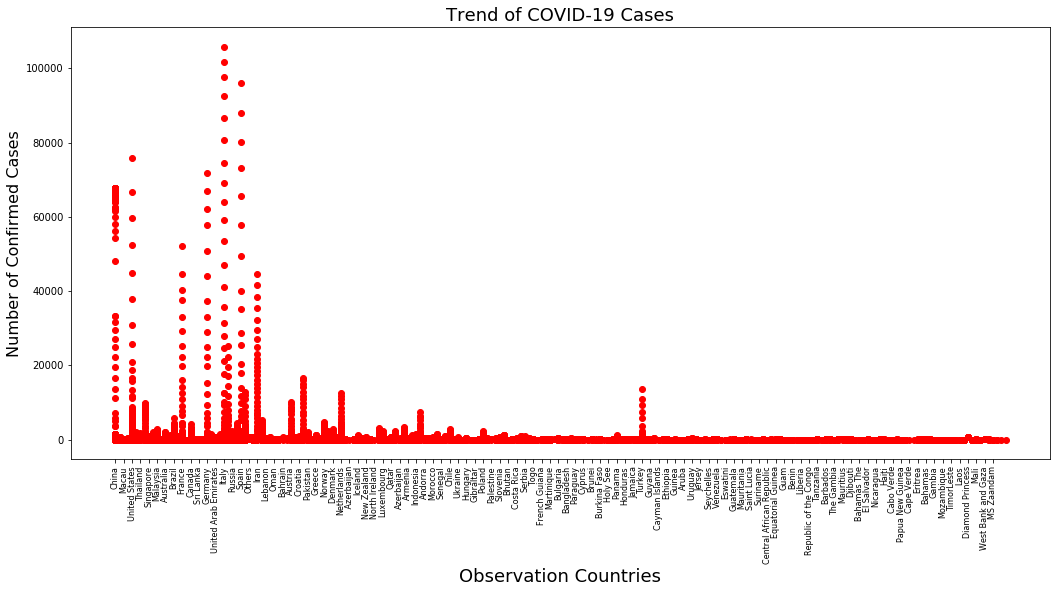

In [23]:
#Plot the Trend of confirmed cases
fig =plt.figure(figsize=(17,10)) #Dimension of plot
ax = fig.add_axes([0,0,.8,.6])
ax.scatter(x=data['Country/Region'],y=data['Confirmed'], color = 'red')
ax.set_title('Trend of COVID-19 Cases',fontsize=18)
ax.set_xlabel('Observation Countries',fontsize=18)
ax.set_ylabel('Number of Confirmed Cases',fontsize=16)
plt.xticks(range(0,212,2), rotation = 90) #Every other country lael is displayed
plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()

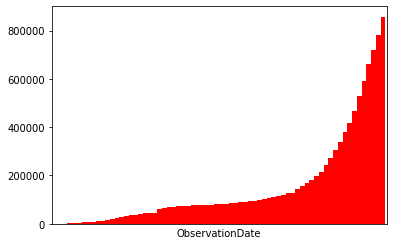

In [24]:
#Increase in number of cases with time
dg = (pd.Series(data.groupby('ObservationDate')['Confirmed'].sum(), 
                index = data.groupby('ObservationDate')['Confirmed']
                .sum().index))

dg.plot(kind='bar',width=1, color = 'red')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.xticks([])
plt.show()

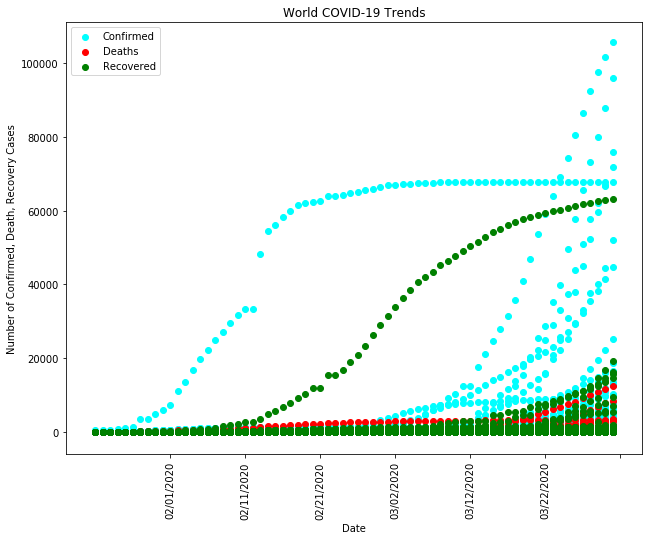

In [25]:
#Confirmed Cases, Recovery and Deaths over trend
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,.8,.6])
ax.scatter(data['ObservationDate'], data['Confirmed'], color = 'cyan', label ='Confirmed')
ax.scatter(data['ObservationDate'], data['Deaths'], color = 'red', label ='Deaths')
ax.scatter(data['ObservationDate'], data['Recovered'], color = 'green', label ='Recovered')
ax.set_title('World COVID-19 Trends')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed, Death, Recovery Cases')
ax.legend(loc='upper left')
plt.xticks([10,20,30,40,50,60,70], rotation = 90)

plt.show()

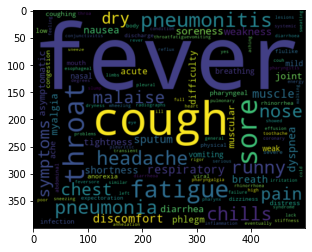

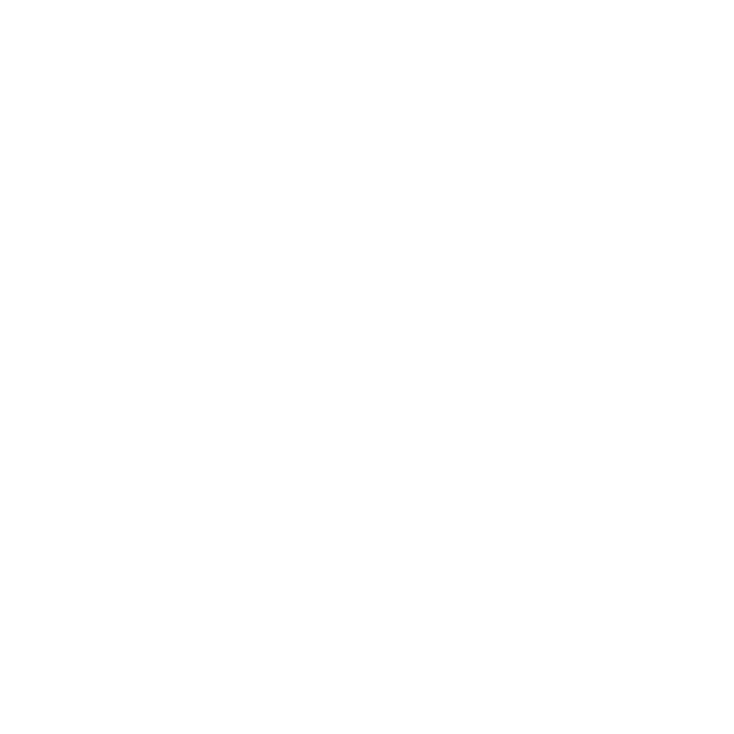

In [26]:
#Plotting wordcloud of symptons
allwords = ' '.join([word for word in demogr_data['symptoms']]) #join the words in symptons column
allwords

wordcloud =( WordCloud(width=500, height=400, 
                       background_color='black', 
                       min_font_size=8, collocations=False, max_font_size=300).generate(allwords))

plt.imshow(wordcloud,interpolation='bilinear')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.tight_layout(pad=0)
plt.ylabel('Weighted Symptons of Coronavirus')
plt.show()

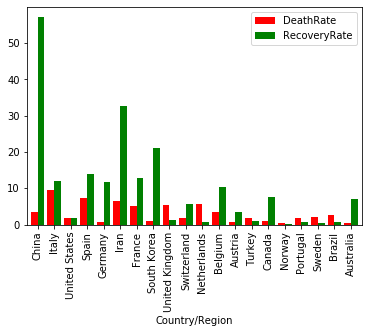

In [27]:
#Mortality vs Recovery rates in top ten countries with confirmed cases
country_grps.set_index('Country/Region').head(15) #set the country column as index (x axis of plot)

# countries = ['China','Italy', 'Spain','United States','Germany','South Korea','France','Switzerland','UK']

(country_grps.set_index('Country/Region').head(20)[['DeathRate','RecoveryRate']]
 .plot(kind='bar', width= 0.8, sharex=True, subplots=False, color=['red','green']))
plt.xticks(range(0,20,1)) #give positions to the x_axis points
plt.show()

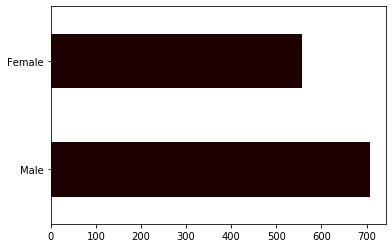

In [28]:
#Plotting the age distriution of the sample data
demogr_data.drop(demogr_data[demogr_data['sex'] == '4000'].index, inplace = True)
demogr_data['sex'].str.capitalize().dropna().value_counts().plot(kind='barh',colormap ='pink')#Make lowercase, drop NaN
plt.show()


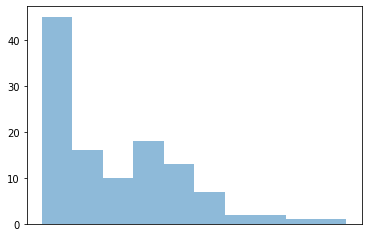

In [29]:
plt.hist(demogr_data['age'].dropna().value_counts(), alpha=0.5)
plt.xticks([], rotation=90)
plt.show()

## Export Data as CSV

In [30]:
demogr_data = demogr_data.dropna() #Remove all null values

date = pd.Timestamp.today().strftime(f'%d-%m-%Y') #Create Today's date object

data.to_csv(f'CovidCleanData\covid_data_Apr2_{date}_cleaned.csv', index=True, header=True)
country_grps.to_csv(f'CovidCleanData\covid_by_country_{date}_cleaned.csv', index=True, header = True)
demogr_data.to_csv(f'CovidCleanData\covid_by_demography_{date}_cleaned.csv', index=True, header = True)